## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from plotnine import *

from sklearn.linear_model import LogisticRegression # Logistic Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import cross_val_score # cross validation metrics
from sklearn.model_selection import cross_val_predict # cross validation metrics
from sklearn.preprocessing import OrdinalEncoder
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score #model evaluation

import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## Load DF

In [4]:
df = pd.read_csv("./listingss.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,106332,"Lovely large room, Bethnal Green",264345,Susie,NaN,Tower Hamlets,51.52874,-0.05396,Private room,55,3,65,2016-06-10,0.47,1,74,0,NaN
1,13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.56861,-0.11270,Private room,50,1,30,2022-07-15,0.20,2,343,9,NaN
2,284532,COSY STUDIO-FLAT WITH A GREAT VIEW,1481412,Luca,NaN,Tower Hamlets,51.52851,-0.07426,Entire home/apt,90,5,42,2022-01-04,0.34,1,222,1,NaN
3,107048,A Luxury Studio Suite in Clerkenwell,259088,Simon,NaN,Islington,51.52478,-0.10484,Private room,180,4,493,2022-09-02,3.59,5,236,20,NaN
4,284603,Notting Hill church stay in Heaven!,1481851,Tania,NaN,Kensington and Chelsea,51.51464,-0.20004,Entire home/apt,297,14,6,2022-07-04,0.05,1,180,2,NaN


In [5]:
df.dropna()
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,106332,"Lovely large room, Bethnal Green",264345,Susie,NaN,Tower Hamlets,51.52874,-0.05396,Private room,55,3,65,2016-06-10,0.47,1,74,0,NaN
1,13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.56861,-0.11270,Private room,50,1,30,2022-07-15,0.20,2,343,9,NaN
2,284532,COSY STUDIO-FLAT WITH A GREAT VIEW,1481412,Luca,NaN,Tower Hamlets,51.52851,-0.07426,Entire home/apt,90,5,42,2022-01-04,0.34,1,222,1,NaN
3,107048,A Luxury Studio Suite in Clerkenwell,259088,Simon,NaN,Islington,51.52478,-0.10484,Private room,180,4,493,2022-09-02,3.59,5,236,20,NaN
4,284603,Notting Hill church stay in Heaven!,1481851,Tania,NaN,Kensington and Chelsea,51.51464,-0.20004,Entire home/apt,297,14,6,2022-07-04,0.05,1,180,2,NaN


## Linear Regression 

In [6]:
preds = ['latitude','longitude','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365','number_of_reviews_ltm']

y = df["price"]


X_train, X_test, y_train, y_test = train_test_split(df[preds],y, test_size = 0.2)

In [7]:
# create and fit
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
# predictions
y_pred = model.predict(X_test)

## Model Evaluation

In [9]:
#training R2 (goodness of fit)
print("R2 TRAIN:", model.score(X_train, y_train))

#testing R2
print("R2 TEST:", model.score(X_test, y_test))

R2 TRAIN: 0.11567354765550197
R2 TEST: 0.0866632158186702


In [10]:
# mse and mae

print("MSE:", mean_squared_error(y_test,y_pred ))
print("MAE:", mean_absolute_error(y_test,y_pred ))

MSE: 211348.3688261384
MAE: 128.46428352946


In [11]:
# true vs. pred
true_vs_pred = pd.DataFrame({"predicted": y_pred, 
                            "true": y_test})

true_vs_pred

,predicted,true
50921,138.592559,350
48783,137.033306,150
13545,185.778444,75
44635,101.192614,55
49013,240.795990,115
...,...,...
7846,106.492598,130
7410,120.612497,145
38864,105.689866,29
58017,172.490687,515


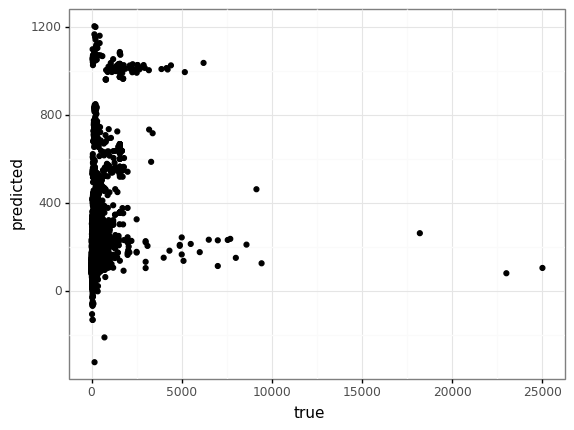

<ggplot: (8788577424442)>

In [15]:
# plot
(ggplot(true_vs_pred, aes(x = "true", y = "predicted")) + geom_point()) + theme_bw()

In [12]:
# coef df
coefficients = pd.DataFrame({"Coef": model.coef_,
                            "Name": preds})

coefficients

,Coef,Name
0,-61.613435,latitude
1,-138.902688,longitude
2,0.039242,minimum_nights
3,-0.329023,number_of_reviews
4,3.340993,calculated_host_listings_count
5,0.287817,availability_365
6,-0.460501,number_of_reviews_ltm


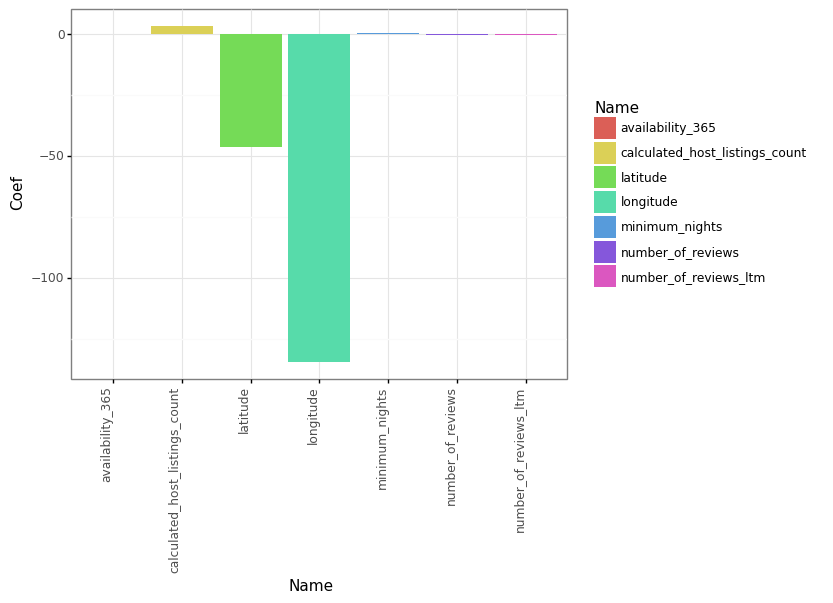

<ggplot: (8767564093787)>

In [34]:
# coef plot
(ggplot(coefficients, aes(x = "Name", y = "Coef", fill = "Name" )) + theme_bw() + geom_bar(stat = "identity")) + theme(axis_text_x  = element_text(angle = 90, hjust = 1))